
__Problem Statement:__<br>
Pick up the following stocks and generate forecasts accordingly Stocks:
NASDAQ.AAPL<br>
NASDAQ.ADP<br>
NASDAQ.CBOE<br>
NASDAQ.CSCO<br>
NASDAQ.EBAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv("SP 500 Stock Prices 2014-2017.csv")

In [3]:
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
data.shape

(497472, 7)

In [5]:
data['symbol'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK',
       'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX',
       'BEN', 'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX',
       'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS',
       'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHK',
       'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME',
       'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO',
       'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL',
       'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'C', 'DAL', 'D

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [7]:
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d",errors='ignore')

In [8]:
data['date'].dtype

dtype('<M8[ns]')

In [9]:
data['date'].tail()

497467   2017-12-29
497468   2017-12-29
497469   2017-12-29
497470   2017-12-29
497471   2017-12-29
Name: date, dtype: datetime64[ns]

In [10]:
d1 = pd.DataFrame(data[data['symbol'] == ('AAPL')])
d2 = pd.DataFrame(data[data['symbol'] == ('ADP')])
d3 = pd.DataFrame(data[data['symbol'] == ('CBOE')])
d4 = pd.DataFrame(data[data['symbol'] == ('CSCO')])
d5 = pd.DataFrame(data[data['symbol'] == ('EBAY')])

In [11]:
frames = [d1, d2, d3, d4, d5]
data_new = pd.concat(frames)

In [12]:
data_new.head()

,symbol,date,open,high,low,close,volume
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
484,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
967,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
1450,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
1933,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685


In [13]:
data_new.symbol.unique()

array(['AAPL', 'ADP', 'CBOE', 'CSCO', 'EBAY'], dtype=object)

In [14]:
data_new.reset_index(drop=True)

,symbol,date,open,high,low,close,volume
0,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
1,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
2,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
3,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
4,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685
...,...,...,...,...,...,...,...
5030,EBAY,2017-12-22,37.6900,37.9050,37.5300,37.7600,7603257
5031,EBAY,2017-12-26,37.7900,38.0100,37.6050,37.9400,4537016
5032,EBAY,2017-12-27,38.0700,38.0800,37.5600,37.6100,4244081
5033,EBAY,2017-12-28,37.4600,37.9300,37.4501,37.9200,3399269


In [15]:
data_new.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [16]:
data_AAPL = data_new[data_new['symbol'] == ('AAPL')].copy()

In [18]:
data_AAPL.index = data_AAPL['date']

In [22]:
data_AAPL.drop('date',axis=1,inplace=True)

In [32]:
data_AAPL.drop('symbol',axis=1,inplace=True)

In [33]:
data_AAPL

,open,high,low,close,volume
date,,,,,
2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685
...,...,...,...,...,...
2017-12-22,174.6800,175.4240,174.5000,175.0100,16349444
2017-12-26,170.8000,171.4700,169.6790,170.5700,33185536
2017-12-27,170.1000,170.7800,169.7100,170.6000,21498213


<AxesSubplot:xlabel='date'>

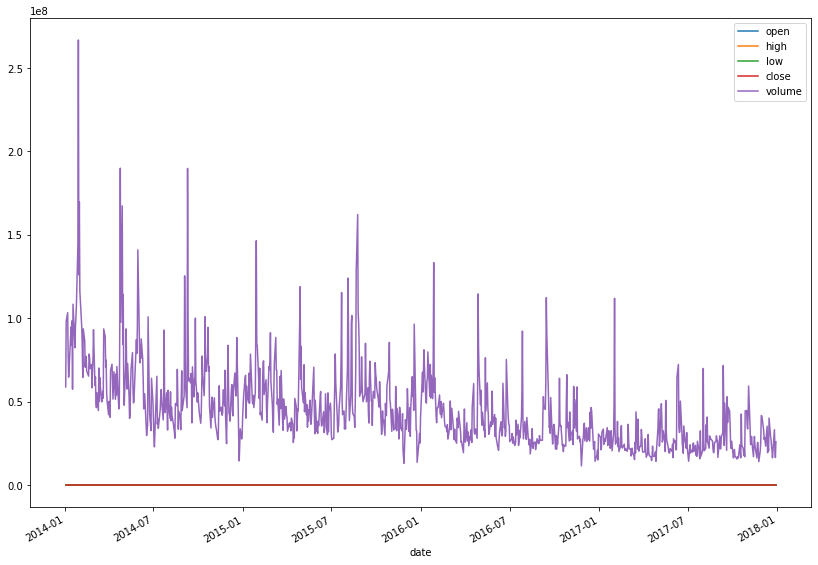

In [34]:
data_AAPL.plot(figsize=(14,10))

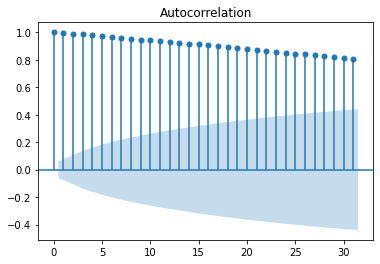

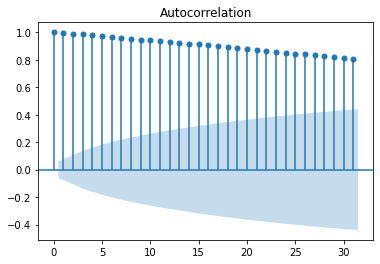

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_AAPL['high'])

In [31]:
data_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2014-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1007 non-null   object 
 1   open    1007 non-null   float64
 2   high    1007 non-null   float64
 3   low     1007 non-null   float64
 4   close   1007 non-null   float64
 5   volume  1007 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 87.4+ KB
